In [1]:
import random
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Reshape,InputLayer,GlobalAveragePooling2D,DepthwiseConv2D,Dropout,MaxPooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import itertools

In [3]:
import os
#os.chdir('data')
print(os.getcwd())

c:\Users\HP\Documents\GitHub\CNN-ON-FPGA-MSc.-\Training Model(Python)


In [4]:
os.chdir('Dataset')
train_path='train'
test_path='test'
valid_path='valid'
print(train_path)
#os.mkdir('valid')


train


In [4]:
valid_path='valid'

In [8]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path,target_size=(256,256),batch_size=128)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path,target_size=(256,256),batch_size=64)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,target_size=(256,256),batch_size=64,shuffle=False)


Found 25200 images belonging to 45 classes.
Found 1800 images belonging to 45 classes.
Found 4500 images belonging to 45 classes.


In [10]:
import sys
from PIL import Image
sys.modules['Image'] = Image 


In [11]:
import Image 


In [13]:
def prepare_image(file):
    img_path='train/'
    img=image.load_img(img_path+file,target_size=(256,256))
    img_arr=image.img_to_array(img)
    img_expnd=np.expand_dims(img_arr,axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_expnd)


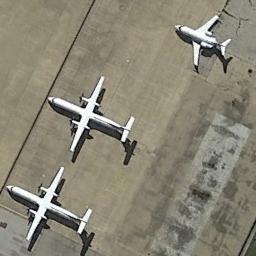

In [15]:
from IPython.display import Image
Image(filename='train/airplane/airplane_001.jpg',width=300,height=200)

In [16]:
mobile=tf.keras.applications.mobilenet.MobileNet()


In [21]:
mobmod=Sequential()
mobmod.add(InputLayer(shape=(256,256,3)))
for layer in mobile.layers[1:]:
    mobmod.add(layer)
mobmod.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 128, 128, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 128, 128, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 128, 128, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 64, 64, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 64, 64, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 64, 64, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 64, 64, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [23]:
from tensorflow.keras.applications import imagenet_utils

preproc=prepare_image('airplane/airplane_001.jpg')
predictions=mobmod.predict(preproc)
results=imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


[[('n02690373', 'airliner', 0.21581939),
  ('n04552348', 'warplane', 0.18815592),
  ('n04008634', 'projectile', 0.13327375),
  ('n03773504', 'missile', 0.12741336),
  ('n04592741', 'wing', 0.061923455)]]

In [8]:
mobile.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [23]:
for i, layer in enumerate(mobile.layers):
    print(f"Layer {i}: {layer.name}")


Layer 0: input_layer
Layer 1: conv1
Layer 2: conv1_bn
Layer 3: conv1_relu
Layer 4: conv_dw_1
Layer 5: conv_dw_1_bn
Layer 6: conv_dw_1_relu
Layer 7: conv_pw_1
Layer 8: conv_pw_1_bn
Layer 9: conv_pw_1_relu
Layer 10: conv_pad_2
Layer 11: conv_dw_2
Layer 12: conv_dw_2_bn
Layer 13: conv_dw_2_relu
Layer 14: conv_pw_2
Layer 15: conv_pw_2_bn
Layer 16: conv_pw_2_relu
Layer 17: conv_dw_3
Layer 18: conv_dw_3_bn
Layer 19: conv_dw_3_relu
Layer 20: conv_pw_3
Layer 21: conv_pw_3_bn
Layer 22: conv_pw_3_relu
Layer 23: conv_pad_4
Layer 24: conv_dw_4
Layer 25: conv_dw_4_bn
Layer 26: conv_dw_4_relu
Layer 27: conv_pw_4
Layer 28: conv_pw_4_bn
Layer 29: conv_pw_4_relu
Layer 30: conv_dw_5
Layer 31: conv_dw_5_bn
Layer 32: conv_dw_5_relu
Layer 33: conv_pw_5
Layer 34: conv_pw_5_bn
Layer 35: conv_pw_5_relu
Layer 36: conv_pad_6
Layer 37: conv_dw_6
Layer 38: conv_dw_6_bn
Layer 39: conv_dw_6_relu
Layer 40: conv_pw_6
Layer 41: conv_pw_6_bn
Layer 42: conv_pw_6_relu
Layer 43: conv_dw_7
Layer 44: conv_dw_7_bn
Layer 45: 

In [34]:
model=Sequential()
model.add(InputLayer(shape=(256, 256, 3)))



In [35]:
for layer in mobile.layers[1:43]:
     if isinstance(layer, Conv2D):
        
        print(f'Layer {layer.name} is a Conv2D layer with {layer.filters} filters')
        newfilters=(int)(layer.filters/4)
        newlayer=Conv2D(newfilters, layer.kernel_size, strides=layer.strides,
                      padding=layer.padding, activation=layer.activation,
                      use_bias=layer.use_bias, kernel_initializer=layer.kernel_initializer,
                      bias_initializer=layer.bias_initializer)
        model.add(newlayer)
        print(f'Layer {newlayer.name} is a Conv2D layer with {newlayer.filters} filters')
     elif isinstance(layer, BatchNormalization) :
        model.add(BatchNormalization(axis=getattr(layer, 'axis', -1),
    momentum=getattr(layer, 'momentum', 0.99),
    epsilon=getattr(layer, 'epsilon', 1e-3),
    center=getattr(layer, 'center', True),
    scale=getattr(layer, 'scale', True),
    beta_initializer=getattr(layer, 'beta_initializer', 'zeros'),
    gamma_initializer=getattr(layer, 'gamma_initializer', 'ones'),
    moving_mean_initializer=getattr(layer, 'moving_mean_initializer', 'zeros'),
    moving_variance_initializer=getattr(layer, 'moving_variance_initializer', 'ones'),
    beta_regularizer=getattr(layer, 'beta_regularizer', None),
    gamma_regularizer=getattr(layer, 'gamma_regularizer', None),
    beta_constraint=getattr(layer, 'beta_constraint', None),
    gamma_constraint=getattr(layer, 'gamma_constraint', None)))
     elif isinstance(layer,DepthwiseConv2D):
         model.add(DepthwiseConv2D(kernel_size=getattr(layer, 'kernel_size', (3, 3)),
    strides=getattr(layer, 'strides', (1, 1)),
    padding=getattr(layer, 'padding', 'valid'),
    depth_multiplier=getattr(layer, 'depth_multiplier', 1),
    activation=getattr(layer, 'activation', None),
    use_bias=getattr(layer, 'use_bias', True),
    bias_initializer=getattr(layer, 'bias_initializer', 'zeros'),
    depthwise_initializer=getattr(layer, 'depthwise_initializer', 'glorot_uniform')
))
     else:
         model.add(layer)

   

Layer conv1 is a Conv2D layer with 32 filters
Layer conv2d_9 is a Conv2D layer with 8 filters
Layer conv_pw_1 is a Conv2D layer with 64 filters
Layer conv2d_10 is a Conv2D layer with 16 filters
Layer conv_pw_2 is a Conv2D layer with 128 filters
Layer conv2d_11 is a Conv2D layer with 32 filters
Layer conv_pw_3 is a Conv2D layer with 128 filters
Layer conv2d_12 is a Conv2D layer with 32 filters
Layer conv_pw_4 is a Conv2D layer with 256 filters
Layer conv2d_13 is a Conv2D layer with 64 filters
Layer conv_pw_5 is a Conv2D layer with 256 filters
Layer conv2d_14 is a Conv2D layer with 64 filters
Layer conv_pw_6 is a Conv2D layer with 512 filters
Layer conv2d_15 is a Conv2D layer with 128 filters


In [36]:
for layer in mobile.layers[73:86]:
     if isinstance(layer, Conv2D):
        
        print(f'Layer {layer.name} is a Conv2D layer with {layer.filters} filters')
        newfilters=(int)(layer.filters/4)
        newlayer=Conv2D(newfilters, layer.kernel_size, strides=layer.strides,
                      padding=layer.padding, activation=layer.activation,
                      use_bias=layer.use_bias, kernel_initializer=layer.kernel_initializer,
                      bias_initializer=layer.bias_initializer)
        model.add(newlayer)
        print(f'Layer {newlayer.name} is a Conv2D layer with {newlayer.filters} filters')
     elif isinstance(layer, BatchNormalization) :
        model.add(BatchNormalization(axis=getattr(layer, 'axis', -1),
    momentum=getattr(layer, 'momentum', 0.99),
    epsilon=getattr(layer, 'epsilon', 1e-3),
    center=getattr(layer, 'center', True),
    scale=getattr(layer, 'scale', True),
    beta_initializer=getattr(layer, 'beta_initializer', 'zeros'),
    gamma_initializer=getattr(layer, 'gamma_initializer', 'ones'),
    moving_mean_initializer=getattr(layer, 'moving_mean_initializer', 'zeros'),
    moving_variance_initializer=getattr(layer, 'moving_variance_initializer', 'ones'),
    beta_regularizer=getattr(layer, 'beta_regularizer', None),
    gamma_regularizer=getattr(layer, 'gamma_regularizer', None),
    beta_constraint=getattr(layer, 'beta_constraint', None),
    gamma_constraint=getattr(layer, 'gamma_constraint', None)))
     elif isinstance(layer,DepthwiseConv2D):
         model.add(DepthwiseConv2D(kernel_size=getattr(layer, 'kernel_size', (3, 3)),
    strides=getattr(layer, 'strides', (1, 1)),
    padding=getattr(layer, 'padding', 'valid'),
    depth_multiplier=getattr(layer, 'depth_multiplier', 1),
    activation=getattr(layer, 'activation', None),
    use_bias=getattr(layer, 'use_bias', True),
    bias_initializer=getattr(layer, 'bias_initializer', 'zeros'),
    depthwise_initializer=getattr(layer, 'depthwise_initializer', 'glorot_uniform')
))
     else:
         model.add(layer)

   

Layer conv_pw_12 is a Conv2D layer with 1024 filters
Layer conv2d_16 is a Conv2D layer with 256 filters
Layer conv_pw_13 is a Conv2D layer with 1024 filters
Layer conv2d_17 is a Conv2D layer with 256 filters


In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 8)    │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 128, 128, 8)    │            72 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 16)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 64, 64, 16)     │           144 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 64, 64, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         1,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 125,744 (491.19 KB)

 Trainable params: 122,832 (479.81 KB)

 Non-trainable params: 2,912 (11.38 KB)

In [37]:
model.add(GlobalAveragePooling2D(name='global_average_pooling2d'))
#model.add(Dropout(rate=0.01, name='dropout'))


In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 8)    │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 128, 128, 8)    │            72 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 16)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 64, 64, 16)     │           144 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 64, 64, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         1,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 125,744 (491.19 KB)

 Trainable params: 122,832 (479.81 KB)

 Non-trainable params: 2,912 (11.38 KB)

In [40]:
model.add(Dense(units=45,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 8)    │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_8              │ (None, 128, 128, 8)    │            72 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 16)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_9              │ (None, 64, 64, 16)     │           144 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 32)     │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_10             │ (None, 64, 64, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 32)     │         1,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 137,309 (536.36 KB)

 Trainable params: 134,397 (524.99 KB)

 Non-trainable params: 2,912 (11.38 KB)

In [51]:
model.compile(optimizer=Adam(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy'])


In [60]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)


Epoch 1/10
133/133 - 490s - 4s/step - accuracy: 0.8894 - loss: 0.3280 - val_accuracy: 0.5074 - val_loss: 3.3571
Epoch 2/10
133/133 - 505s - 4s/step - accuracy: 0.8942 - loss: 0.3150 - val_accuracy: 0.3742 - val_loss: 6.5719
Epoch 3/10
133/133 - 484s - 4s/step - accuracy: 0.9087 - loss: 0.2772 - val_accuracy: 0.4121 - val_loss: 5.5137
Epoch 4/10
133/133 - 496s - 4s/step - accuracy: 0.9178 - loss: 0.2493 - val_accuracy: 0.6586 - val_loss: 1.6616
Epoch 5/10
133/133 - 440s - 3s/step - accuracy: 0.9142 - loss: 0.2468 - val_accuracy: 0.4986 - val_loss: 5.2437
Epoch 6/10
133/133 - 404s - 3s/step - accuracy: 0.9340 - loss: 0.2035 - val_accuracy: 0.6844 - val_loss: 1.7136
Epoch 7/10
133/133 - 387s - 3s/step - accuracy: 0.9437 - loss: 0.1686 - val_accuracy: 0.6016 - val_loss: 2.6150
Epoch 8/10
133/133 - 391s - 3s/step - accuracy: 0.9473 - loss: 0.1540 - val_accuracy: 0.5293 - val_loss: 3.6206
Epoch 9/10
133/133 - 385s - 3s/step - accuracy: 0.9469 - loss: 0.1530 - val_accuracy: 0.6778 - val_loss:

In [46]:
import matplotlib.pyplot as plt

def plot_conf_matrix(cm,classes,normalize=False,title='confusionmatrix',cmap=plt.cm.Blues):
    plt.imshow(cm,cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')


In [44]:
predictions=model.predict(x=test_batches,verbose=0)
rounded_pred=np.round(predictions)


In [46]:
from sklearn.metrics import confusion_matrix
test_labels=test_batches.classes
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_pred.argmax(axis=1))
cm_plot_labels=[]
for item in os.listdir('train'):
   cm_plot_labels.append(item)
print(cm_plot_labels)


['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway', 'golf_course', 'ground_track_field', 'harbor', 'industrial_area', 'intersection', 'island', 'lake', 'meadow', 'medium_residential', 'mobile_home_park', 'mountain', 'overpass', 'palace', 'parking_lot', 'railway', 'railway_station', 'rectangular_farmland', 'river', 'roundabout', 'runway', 'sea_ice', 'ship', 'snowberg', 'sparse_residential', 'stadium', 'storage_tank', 'tennis_court', 'terrace', 'thermal_power_station', 'wetland']


In [47]:
predict=np.argmax(rounded_pred,axis=1)
print(predict)
print(test_labels)

[ 0  0  3 ... 34  0 31]
[ 0  0  0 ... 44 44 44]


In [48]:
from sklearn.metrics import f1_score,accuracy_score
f1_micro = f1_score(test_labels, predict,average='micro')
f1_micro

0.37444444444444447

In [49]:
accuracy_score(test_labels,predict)

0.37444444444444447

In [10]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Add, AveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model

In [36]:
def residualblock(input,numfilters,stride):
    layer1=Conv2D(strides=stride,filters=numfilters,kernel_size=(3,3),padding='same')(input)
    layer2=BatchNormalization()(layer1)
    layer3=ReLU()(layer2)
    layer4=Conv2D(strides=stride,filters=numfilters,kernel_size=(3,3),padding='same')(layer3)
    layer5=BatchNormalization()(layer4)
    print(f'before{input.shape}')
    if stride!=1:
        input=Conv2D(strides=stride,filters=numfilters,kernel_size=(1,1),padding='same')(input)
        input=Conv2D(strides=stride,filters=numfilters,kernel_size=(1,1),padding='same')(input)
        input=BatchNormalization()(input)
        print(f'after{input.shape}')
    layer6=Add()([layer5,input])
    out=ReLU()(layer6)
    return out

In [41]:
def ResNet34():
    X_input = Input((256,256,3))
    X = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(X_input)
    X = BatchNormalization()(X)
    X = ReLU()(X)
    X = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(X)
    for i in range(0,3):
        X=residualblock(X,64,1)
    X=residualblock(X,128,2)
    for i in range(0,3):
        X=residualblock(X,128,1)
    X=residualblock(X,256,2)
    for i in range(0,5):
        X=residualblock(X,256,1)
    X=residualblock(X,512,2)
    for i in range(0,2):
        X=residualblock(X,512,1)
    #X = AveragePooling2D(pool_size=(7, 7))(X)

    X = Flatten()(X)
    X = Dense(45, activation='softmax')(X)
    model=Model(inputs=X_input, outputs=X)
    return model

In [42]:
model=ResNet34()
model.summary()

before(None, 64, 64, 64)
before(None, 64, 64, 64)
before(None, 64, 64, 64)
before(None, 64, 64, 64)
after(None, 16, 16, 128)
before(None, 16, 16, 128)
before(None, 16, 16, 128)
before(None, 16, 16, 128)
before(None, 16, 16, 128)
after(None, 4, 4, 256)
before(None, 4, 4, 256)
before(None, 4, 4, 256)
before(None, 4, 4, 256)
before(None, 4, 4, 256)
before(None, 4, 4, 256)
before(None, 4, 4, 256)
after(None, 1, 1, 512)
before(None, 1, 1, 512)
before(None, 1, 1, 512)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_104 (Conv2D) │ (None, 128, 128,  │      9,472 │ input_layer_9[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_104[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_85 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ re_lu_85[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_105 (Conv2D) │ (None, 64, 64,    │     36,928 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_105[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_86 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_106 (Conv2D) │ (None, 64, 64,    │     36,928 │ re_lu_86[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_106[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_42 (Add)        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_87 (ReLU)     │ (None, 64, 64,    │          0 │ add_42[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_107 (Conv2D) │ (None, 64, 64,    │     36,928 │ re_lu_87[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_107[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_88 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_108 (Conv2D) │ (None, 64, 64,    │     36,928 │ re_lu_88[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_108[0][0]

 Total params: 21,678,253 (82.70 MB)

 Trainable params: 21,661,229 (82.63 MB)

 Non-trainable params: 17,024 (66.50 KB)

In [43]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])


In [44]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=15,verbose=2)


Epoch 1/15


c:\Users\HP\Documents\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
